# Daily Pizza Sales Prediction


#### Project Workflow
1. Understand the Dataset
- Review all columns and their meanings (you’ve already done this — great start!)
- Identify which variables are:
- Independent (features): weather, promotions, school status, holidays, etc.
- Dependent (target): daily_sales
2. Clean and Prepare the Data
- Check for missing values or anomalies (e.g., nulls in temperature or sales)
- Convert date column to datetime format
- Create new features if needed:
- Week number
- Is exam week
- Ramadan or Lent flag (already modeled, but you can double-check)
3. Explore the Data (EDA)
Use visualizations to uncover patterns:
- 📈 Line plots of sales over time
- 📊 Bar charts comparing average sales by:
- Day of week
- Month
- Holiday vs non-holiday
- School in session vs strike
- 📉 Boxplots to see sales distribution by weather or promotion
- 📌 Correlation heatmap to see which features influence sales most
4. Model Sales Drivers
- Use regression models (e.g., Linear Regression, Random Forest, XGBoost) to predict daily_sales
- Evaluate feature importance: which variables drive sales the most?
- Try time series models (e.g., ARIMA, Prophet) if you're forecasting future sales
5. Segment Your Insights
- Compare sales during:
- Strike vs normal periods
- Ramadan vs non-Ramadan
- Exam weeks vs regular weeks
- Identify high-performing days (e.g., Fridays with promotions)
6. Make Recommendations
Based on your findings, suggest:
- Best times to run promotions
- How to prepare for low-traffic periods (e.g., strikes, Lent)
- Staffing or inventory adjustments based on seasonality
7. Present Your Work
- Create a dashboard (Excel, Power BI, or Tableau)
- Summarize key insights in a slide deck or report
- Include visuals, trends, and actionable takeaways


# Data Cleaning

In [18]:
# Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#Importing Dataset
df = pd.read_csv('pizza_sales_2021_2025.csv')

In [3]:
df.head()

,date,day_of_week,month,is_weekend,is_holiday,public_holiday_name,university_calendar_status,is_school_in_session,weather,temperature_C,promotion,foot_traffic_index,student_density_index,daily_sales_NGN,transactions_count,avg_order_value_NGN,ramadan,lent
0,2021-01-01,Friday,1,False,True,New Year's Day,In Session,True,Sunny,28.3,False,68,78,98547,66,1493.14,False,False
1,2021-01-02,Saturday,1,True,False,NaN,In Session,True,Sunny,30.8,False,63,77,91897,62,1482.21,False,False
2,2021-01-03,Sunday,1,True,False,NaN,In Session,True,Sunny,29.4,False,81,67,109870,70,1569.57,False,False
3,2021-01-04,Monday,1,False,False,NaN,In Session,True,Sunny,27.9,False,64,63,86930,57,1525.09,False,False
4,2021-01-05,Tuesday,1,False,False,NaN,In Session,True,Cloudy,28.5,False,69,73,84555,53,1595.38,False,False


In [4]:
df.columns

Index(['date', 'day_of_week', 'month', 'is_weekend', 'is_holiday',
       'public_holiday_name', 'university_calendar_status',
       'is_school_in_session', 'weather', 'temperature_C', 'promotion',
       'foot_traffic_index', 'student_density_index', 'daily_sales_NGN',
       'transactions_count', 'avg_order_value_NGN', 'ramadan', 'lent'],
      dtype='object')

In [6]:
df.drop(['ramadan', 'lent'], axis=1, inplace=True)

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        1826 non-null   object 
 1   day_of_week                 1826 non-null   object 
 2   month                       1826 non-null   int64  
 3   is_weekend                  1826 non-null   bool   
 4   is_holiday                  1826 non-null   bool   
 5   public_holiday_name         50 non-null     object 
 6   university_calendar_status  1826 non-null   object 
 7   is_school_in_session        1826 non-null   bool   
 8   weather                     1826 non-null   object 
 9   temperature_C               1826 non-null   float64
 10  promotion                   1826 non-null   bool   
 11  foot_traffic_index          1826 non-null   int64  
 12  student_density_index       1826 non-null   int64  
 13  daily_sales_NGN             1826 

In [11]:
df.describe()

,month,temperature_C,foot_traffic_index,student_density_index,daily_sales_NGN,transactions_count,avg_order_value_NGN
count,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000
mean,6.523549,29.338664,54.714677,54.468237,80662.380066,52.444140,1554.985860
std,3.449478,2.650096,16.615595,26.400837,30855.251055,20.966625,152.331414
min,1.000000,21.600000,5.000000,0.000000,22804.000000,14.000000,972.170000
25%,4.000000,27.500000,43.000000,29.000000,52746.000000,34.000000,1451.462500
50%,7.000000,29.500000,56.000000,64.000000,85400.500000,54.000000,1557.300000
75%,10.000000,31.200000,67.000000,76.000000,102584.250000,67.000000,1655.382500
max,12.000000,37.400000,100.000000,100.000000,175656.000000,117.000000,2054.270000


In [14]:
print(df.isnull().sum())

date                             0
day_of_week                      0
month                            0
is_weekend                       0
is_holiday                       0
public_holiday_name           1776
university_calendar_status       0
is_school_in_session             0
weather                          0
temperature_C                    0
promotion                        0
foot_traffic_index               0
student_density_index            0
daily_sales_NGN                  0
transactions_count               0
avg_order_value_NGN              0
dtype: int64


`Note: `In the `public_holiday_name` column, missing values likely mean “not a public holiday” — which is perfectly valid. So these aren’t errors or gaps in data collection, they’re just non-holiday days.
- Since `is_holiday` as a Boolean column — so you can use that to filter or group.
- Also, When `is_holiday` = False, it’s expected that public_holiday_name = NaN.





In [24]:
# Check for Duplicates
print(df.duplicated().sum())

0


In [28]:
#Check and FIx Data Types
print(df.dtypes)

date                           object
day_of_week                    object
month                           int64
is_weekend                       bool
is_holiday                       bool
public_holiday_name            object
university_calendar_status     object
is_school_in_session             bool
weather                        object
temperature_C                 float64
promotion                        bool
foot_traffic_index              int64
student_density_index           int64
daily_sales_NGN                 int64
transactions_count              int64
avg_order_value_NGN           float64
dtype: object


In [29]:
# Convert Date column to datetime dtype
df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [30]:
#Convert Category columns to category dtype
cat_cols = ['day_of_week', 'month', 'public_holiday_name', 'university_calendar_status', 'weather']
for col in cat_cols:
    df[col] = df[col].astype('category')
    

In [31]:
#Convert Boolean columns to bool dtype
bool_cols = ['is_weekend', 'is_holiday', 'is_school_in_session', 'promotion']
for col in bool_cols:
    df[col] = df[col].astype('bool')

In [33]:
#Convert Numeric Columns to floats type
num_cols = ['temperature_C', 'foot_traffic_index', 'student_density_index', 'daily_sales_NGN', 'transactions_count', 'avg_order_value_NGN']
for col in num_cols:  
    df[col] = df[col].astype('float64')


In [34]:
print(df.dtypes)

date                          datetime64[ns]
day_of_week                         category
month                               category
is_weekend                              bool
is_holiday                              bool
public_holiday_name                 category
university_calendar_status          category
is_school_in_session                    bool
weather                             category
temperature_C                        float64
promotion                               bool
foot_traffic_index                   float64
student_density_index                float64
daily_sales_NGN                      float64
transactions_count                   float64
avg_order_value_NGN                  float64
dtype: object


In [39]:
# Checking Time Continuity to ensure no missing dates

# Create a complete date range
full_range = pd.date_range(start=df['date'].min(), end=df['date'].max())

# Compare with actual dates
missing_dates = full_range.difference(df['date'])

print(f"Missing dates: {missing_dates}")


Missing dates: DatetimeIndex([], dtype='datetime64[ns]', freq='D')


## Exploratory Data Analysis

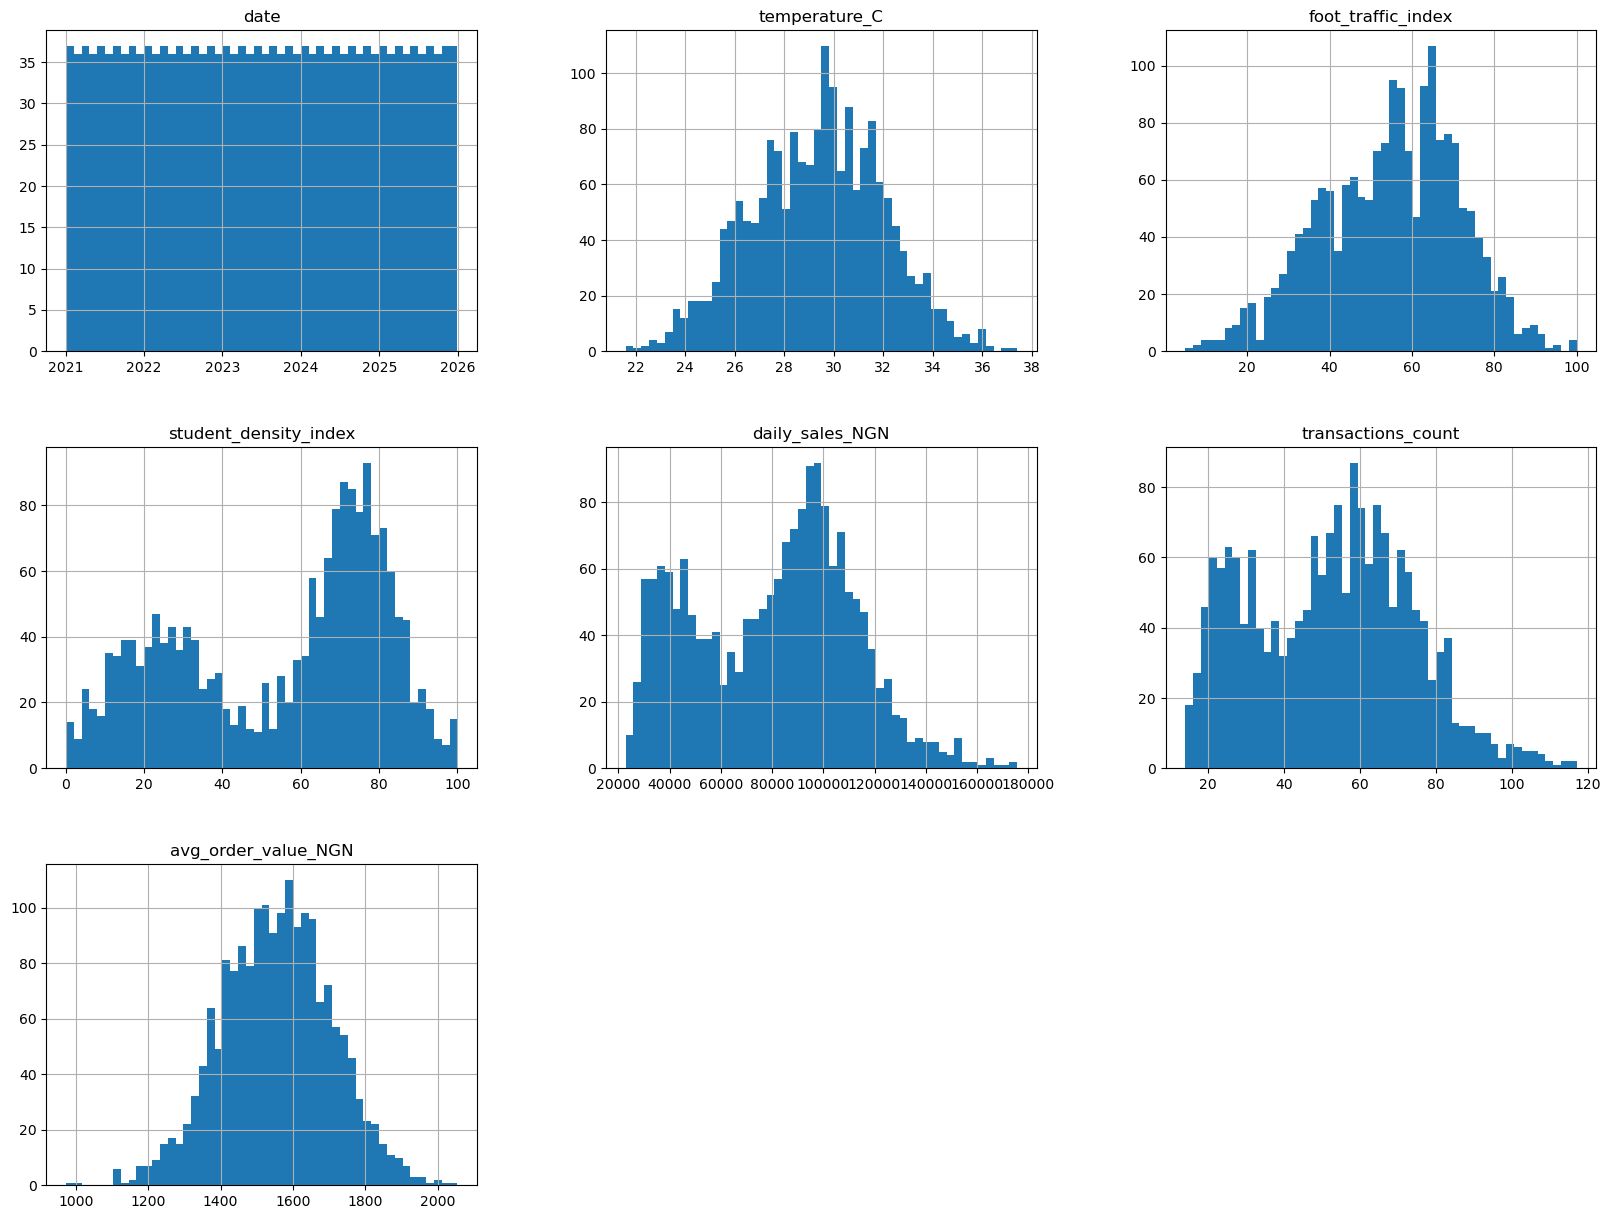

In [40]:
# plot a histogram for each numerical attribute
df.hist(bins=50, figsize=(20,15))
plt.show()


       daily_sales_NGN  temperature_C  student_density_index  \
count      1826.000000    1826.000000            1826.000000   
mean      80662.380066      29.338664              54.468237   
std       30855.251055       2.650096              26.400837   
min       22804.000000      21.600000               0.000000   
25%       52746.000000      27.500000              29.000000   
50%       85400.500000      29.500000              64.000000   
75%      102584.250000      31.200000              76.000000   
max      175656.000000      37.400000             100.000000   

       foot_traffic_index  transactions_count  avg_order_value_NGN  
count         1826.000000         1826.000000          1826.000000  
mean            54.714677           52.444140          1554.985860  
std             16.615595           20.966625           152.331414  
min              5.000000           14.000000           972.170000  
25%             43.000000           34.000000          1451.462500  
50%      

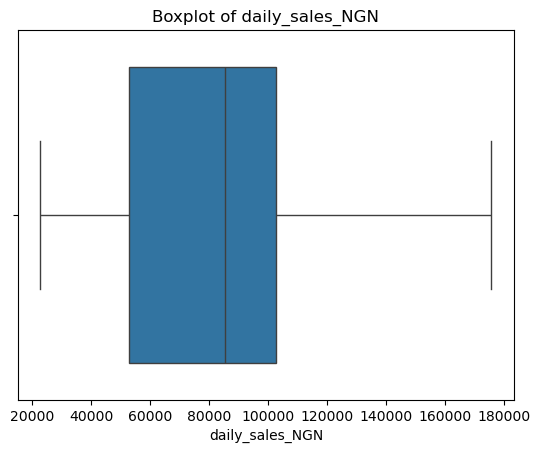

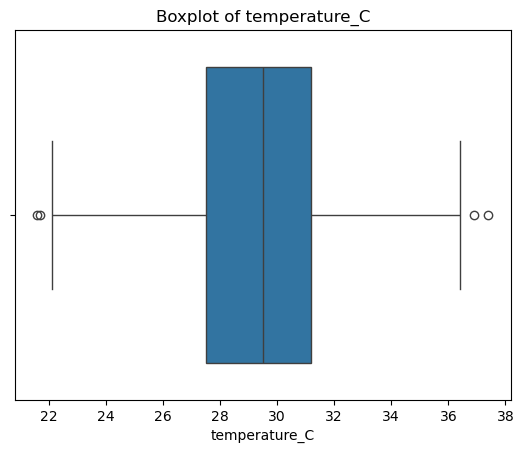

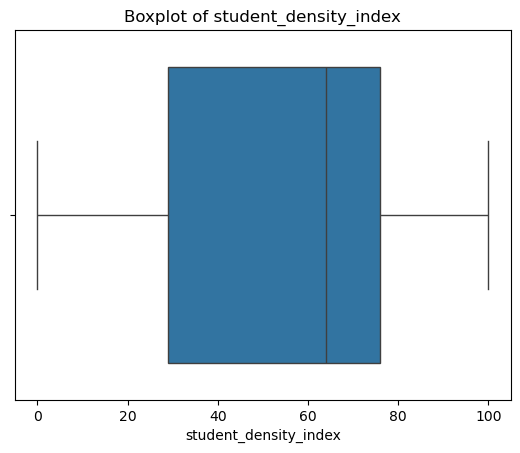

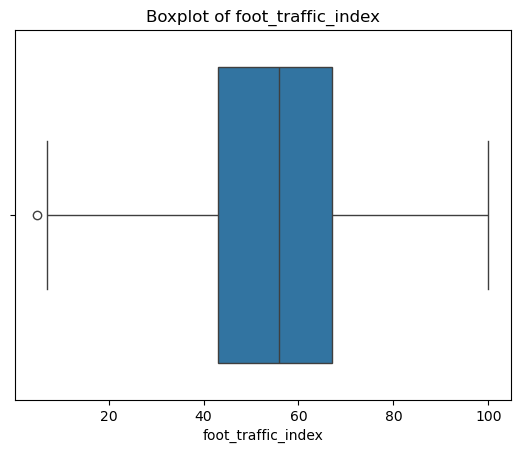

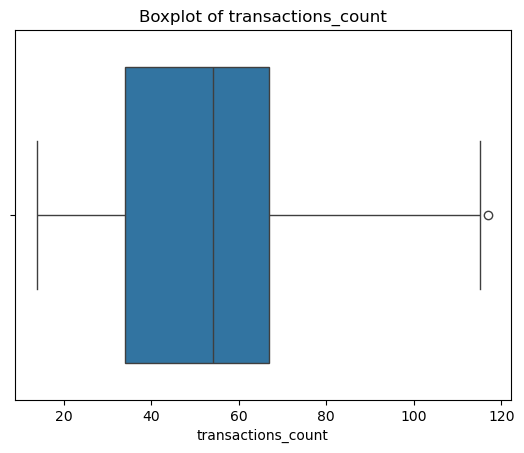

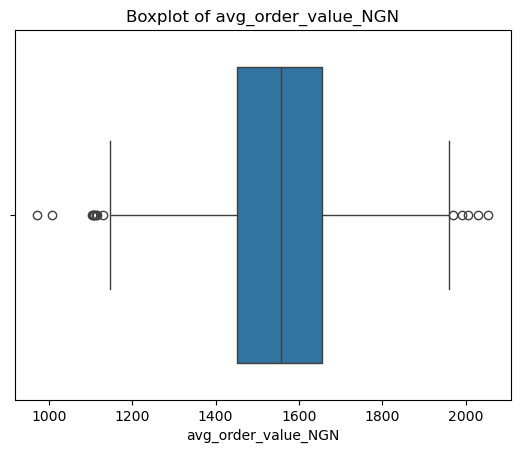

In [45]:
# Summary stats
print(
    df[['daily_sales_NGN', 'temperature_C', 'student_density_index', 'foot_traffic_index', 'transactions_count', 'avg_order_value_NGN']].describe()
)


# Visualizing boxplots for numerical columns
for col in ['daily_sales_NGN', 'temperature_C', 'student_density_index', 'foot_traffic_index', 'transactions_count', 'avg_order_value_NGN']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

### Looking for Correlations

In [53]:
corr_matrix = df[num_cols].corr()

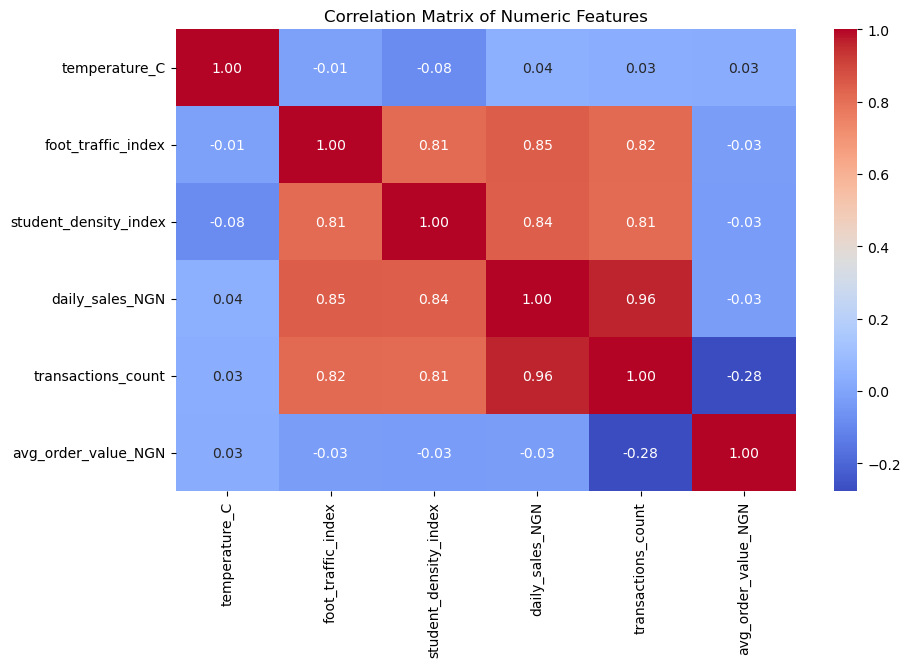

In [55]:
# Visualizing the correlation matrix using a heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

Understand the `correlation martix` before continuing with Data Preprocessing

## Data Preprocessing

- Handle Missing Values
- Define Variables
- Feature Engineering & Featur Scaling where necessary
- Encoding Categorical data


`Note:` For Feature engineering on this project;

 Addressing Special Non-Public HolidaysYou should create a new binary feature specifically to capture the effect of fixed, non-official holidays that dramatically influence consumer spending and dining habits.
 1. Create a New Feature: Festive_Day_FlagInstead of trying to fit Valentine's Day into the Is_Holiday column (which should be reserved only for nationally recognized public holidays), you should create a separate binary flag:
 
- New Column Name:  Festive_Day_FlagBinary
- DataType: (0 or 1)
- Description : 1 if the date is a major, fixed festive day known to influence dining, 0 otherwise
- Dates to Flag (Examples): February 14th (Valentine's), Mother's Day, Father's Day, New Year's Eve (Dec 31st).


`Note:` for Encoding Categorical Data;
1. One-Hot Encoding (Dummy Variables)
Best for tree-based models (Random Forest, XGBoost) and linear models.
`df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)`

- drop_first=True avoids multicollinearity by removing one category per feature.
- This turns each category into a binary column (0 or 1).


In [58]:
print(df.columns)


Index(['date', 'day_of_week', 'month', 'is_weekend', 'is_holiday',
       'public_holiday_name', 'university_calendar_status',
       'is_school_in_session', 'weather', 'temperature_C', 'promotion',
       'foot_traffic_index', 'student_density_index', 'daily_sales_NGN',
       'transactions_count', 'avg_order_value_NGN'],
      dtype='object')


In [59]:
#Feature Engineering #Lag Features
# Sales lags
df['sales_lag_1'] = df['daily_sales_NGN'].shift(1)
df['sales_lag_7'] = df['daily_sales_NGN'].shift(7)
df['sales_lag_30'] = df['daily_sales_NGN'].shift(30)

# Foot traffic lags
df['traffic_lag_1'] = df['foot_traffic_index'].shift(1)
df['traffic_lag_7'] = df['foot_traffic_index'].shift(7)

# Transactions lags
df['transactions_lag_1'] = df['transactions_count'].shift(1)
df['transactions_lag_7'] = df['transactions_count'].shift(7)


In [61]:
#Rolling averages; helps the model understand recent trends and smooth out daily noise.

# Rolling averages for sales
df['sales_7d_avg'] = df['daily_sales_NGN'].rolling(window=7).mean()
df['sales_30d_avg'] = df['daily_sales_NGN'].rolling(window=30).mean()

# Rolling averages for foot traffic and transactions
df['traffic_7d_avg'] = df['foot_traffic_index'].rolling(window=7).mean()
df['transactions_7d_avg'] = df['transactions_count'].rolling(window=7).mean()
df.head(15)

,date,day_of_week,month,is_weekend,is_holiday,public_holiday_name,university_calendar_status,is_school_in_session,weather,temperature_C,...,sales_lag_7,sales_lag_30,traffic_lag_1,traffic_lag_7,transactions_lag_1,transactions_lag_7,sales_7d_avg,sales_30d_avg,traffic_7d_avg,transactions_7d_avg
0,2021-01-01,Friday,1,False,True,New Year's Day,In Session,True,Sunny,28.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-02,Saturday,1,True,False,NaN,In Session,True,Sunny,30.8,...,NaN,NaN,68.0,NaN,66.0,NaN,NaN,NaN,NaN,NaN
2,2021-01-03,Sunday,1,True,False,NaN,In Session,True,Sunny,29.4,...,NaN,NaN,63.0,NaN,62.0,NaN,NaN,NaN,NaN,NaN
3,2021-01-04,Monday,1,False,False,NaN,In Session,True,Sunny,27.9,...,NaN,NaN,81.0,NaN,70.0,NaN,NaN,NaN,NaN,NaN
4,2021-01-05,Tuesday,1,False,False,NaN,In Session,True,Cloudy,28.5,...,NaN,NaN,64.0,NaN,57.0,NaN,NaN,NaN,NaN,NaN
5,2021-01-06,Wednesday,1,False,False,NaN,In Session,True,Sunny,27.1,...,NaN,NaN,69.0,NaN,53.0,NaN,NaN,NaN,NaN,NaN
6,2021-01-07,Thursday,1,False,False,NaN,In Session,True,Sunny,31.2,...,NaN,NaN,72.0,NaN,66.0,NaN,93206.571429,NaN,69.000000,60.571429
7,2021-01-08,Friday,1,False,False,NaN,In Session,True,Sunny,29.4,...,98547.0,NaN,66.0,68.0,50.0,66.0,93756.571429,NaN,69.000000,59.714286
8,2021-01-09,Saturday,1,True,False,NaN,In Session,True,Cloudy,29.7,...,91897.0,NaN,68.0,63.0,60.0,62.0,96673.000000,NaN,70.142857,61.714286
9,2021-01-10,Sunday,1,True,False,NaN,In Session,True,Sunny,29.7,...,109870.0,NaN,71.0,81.0,76.0,70.0,98223.571429,NaN,71.142857,61.857143


Find answeres to this later;  If I drop the rows of the columns with NaN values, how will the model learn from the detials of their other colums with useful detials

In [62]:
# Adding non official public holidays or festive days that migh affect daily sales

festive_days = [
    '2021-02-14', '2021-03-14', '2021-06-20', '2021-12-24', '2021-12-31',
    '2022-02-14', '2022-03-27', '2022-06-19', '2022-12-24', '2022-12-31',
    '2023-02-14', '2023-03-19', '2023-06-18', '2023-12-24', '2023-12-31',
    '2024-02-14', '2024-03-10', '2024-06-16', '2024-12-24', '2024-12-31',
    '2025-02-14', '2025-03-30', '2025-06-15', '2025-12-24', '2025-12-31'
]

In [63]:
# Adding the names of the non official public holidays

festive_names = {
    '2021-02-14': "Valentine's Day",
    '2021-03-14': "Mother's Day",
    '2021-06-20': "Father's Day",
    '2021-12-24': "Christmas Eve",
    '2021-12-31': "New Year's Eve",
    '2022-02-14': "Valentine's Day",
    '2022-03-27': "Mother's Day",
    '2022-06-19': "Father's Day",
    '2022-12-24': "Christmas Eve",
    '2022-12-31': "New Year's Eve",
    '2023-02-14': "Valentine's Day",
    '2023-03-19': "Mother's Day",
    '2023-06-18': "Father's Day",
    '2023-12-24': "Christmas Eve",
    '2023-12-31': "New Year's Eve",
    '2024-02-14': "Valentine's Day",
    '2024-03-10': "Mother's Day",
    '2024-06-16': "Father's Day",
    '2024-12-24': "Christmas Eve",
    '2024-12-31': "New Year's Eve",
    '2025-02-14': "Valentine's Day",
    '2025-03-30': "Mother's Day",
    '2025-06-15': "Father's Day",
    '2025-12-24': "Christmas Eve",
    '2025-12-31': "New Year's Eve"
}

In [64]:
#Convert Date Column to String Format for mapping
df['date_str'] = df['date'].dt.strftime('%Y-%m-%d') 


In [65]:
# Update the colums to include festive days and their names
df.loc[df['date_str'].isin(festive_days), 'is_holiday'] = True


# Append festive names to public holiday name
df['public_holiday_name'] = df.apply(
    lambda row: festive_names[row['date_str']] if row['date_str'] in festive_names
    else row['public_holiday_name'], axis=1
)

In [66]:
df.drop(columns=['date_str'], inplace=True) #drop the date column in str format

In [ ]:
df

## Train Test Split

## Train or Fit the Model into the Training Dataset